Importing in necessary libraries in the notebook:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Uploading the data:

In [ ]:
inpatient_claims=pd.read_csv('/content/drive/MyDrive/NHIF DATASET.csv')
inpatient_claims

<ipython-input-53-c2ea03f43a4b>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  inpatient_claims=pd.read_csv('/content/drive/MyDrive/NHIF DATASET.csv')


,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,voucher date,branch,county
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,NaN,K N H BRANCH,NAIROBI
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,NaN,KAKAMEGA BRANCH,KAKAMEGA
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,NaN,THIKA BRANCH,KIAMBU
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,NaN,KISUMU BRANCH,KISUMU
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,NaN,MIGORI BRANCH,MIGORI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,MURANG'A,NaN
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,MURANG'A,NaN
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,MURANG'A,NaN
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,MURANG'A,NaN


In [ ]:
inpatient_claims.shape

(904884, 17)

#adding the days till notice column
received date - admission date

In [ ]:
inpatient_claims['Days til notice'] = pd.to_datetime(inpatient_claims['received date'], format='%d/%m/%Y', dayfirst=True) - pd.to_datetime(inpatient_claims['admission date'], format='%d/%m/%Y', dayfirst=True)


In [ ]:
inpatient_claims.shape

(904884, 18)

In [ ]:
inpatient_claims.head()

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,voucher date,branch,county,Days til notice
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,NaN,K N H BRANCH,NAIROBI,-8011 days
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,NaN,KAKAMEGA BRANCH,KAKAMEGA,-8086 days
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,NaN,THIKA BRANCH,KIAMBU,-8083 days
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,NaN,KISUMU BRANCH,KISUMU,-7337 days
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,NaN,MIGORI BRANCH,MIGORI,-5742 days


In [ ]:
inpatient_claims.columns

Index(['r/ship', 'hcp name', 'hcp cat', 'hcp level', 'admission date',
       'discharge date', 'days', 'received date', 'origin FY', 'disease',
       'status', 'scheme', 'Claim Amt', 'Bill Amt', 'voucher date', 'branch',
       'county', 'Days til notice'],
      dtype='object')

In [ ]:
inpatient_claims.dtypes

r/ship                      object
hcp name                    object
hcp cat                     object
hcp level                   object
admission date              object
discharge date              object
days                       float64
received date               object
origin FY                   object
disease                     object
status                      object
scheme                      object
Claim Amt                  float64
Bill Amt                   float64
voucher date                object
branch                      object
county                      object
Days til notice    timedelta64[ns]
dtype: object

In [ ]:
inpatient_claims.head()

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,voucher date,branch,county,Days til notice
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,NaN,K N H BRANCH,NAIROBI,-8011 days
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,NaN,KAKAMEGA BRANCH,KAKAMEGA,-8086 days
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,NaN,THIKA BRANCH,KIAMBU,-8083 days
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,NaN,KISUMU BRANCH,KISUMU,-7337 days
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,NaN,MIGORI BRANCH,MIGORI,-5742 days


In [ ]:
inpatient_claims.select_dtypes(include=['object'])

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,received date,origin FY,disease,status,scheme,voucher date,branch,county
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,02/09/1998,2020/21,C20,U,RETIREES,NaN,K N H BRANCH,NAIROBI
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,23/04/1999,2020/21,J18.9,RH,NHS,NaN,KAKAMEGA BRANCH,KAKAMEGA
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,04/09/1998,2020/21,K63.9,AA,NHS,NaN,THIKA BRANCH,KIAMBU
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,02/09/1998,2018/19,A49,RA,Blank,NaN,KISUMU BRANCH,KISUMU
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,05/12/2002,2018/19,O80.0,RA,NHS,NaN,MIGORI BRANCH,MIGORI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,MURANG'A BRANCH,MURANG'A,NaN
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,MURANG'A BRANCH,MURANG'A,NaN
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,14/04/2023,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,MURANG'A BRANCH,MURANG'A,NaN
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,MURANG'A BRANCH,MURANG'A,NaN


#Numerical

In [ ]:
inpatient_claims.select_dtypes(include=['number'])

,days,Claim Amt,Bill Amt,Days til notice
0,0.0,16000.0,8000.0,-8011 days
1,1.0,1800.0,77330.0,-8086 days
2,4.0,50000.0,50000.0,-8083 days
3,3.0,3600.0,3600.0,-7337 days
4,0.0,17000.0,3439.0,-5742 days
...,...,...,...,...
904879,1.0,5000.0,5000.0,74 days
904880,1.0,5000.0,5000.0,74 days
904881,0.0,5000.0,5000.0,106 days
904882,1.0,5000.0,5000.0,74 days


#Claims distribution

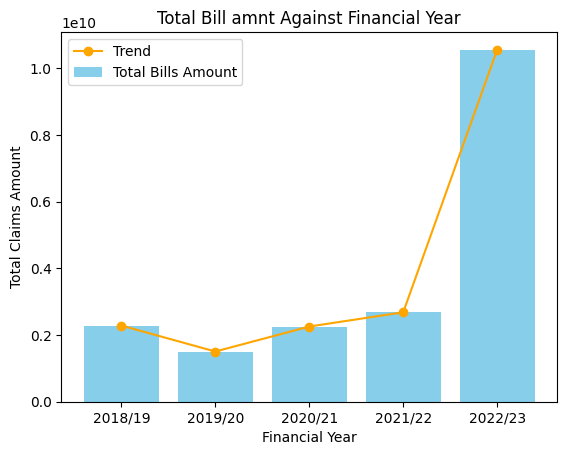

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total claims for each financial year
claims_by_year = inpatient_claims.groupby('origin FY')['Bill Amt'].sum()

# Plot the bar plot
plt.bar(claims_by_year.index, claims_by_year, color='skyblue', label='Total Bills Amount')

# Plot the trend line
plt.plot(claims_by_year.index, claims_by_year, marker='o', color='orange', label='Trend')

# Add labels and title
plt.xlabel('Financial Year')
plt.ylabel('Total Claims Amount')
plt.title('Total Bill amnt Against Financial Year')

# Add legend
plt.legend()

# Show the plot
plt.show()



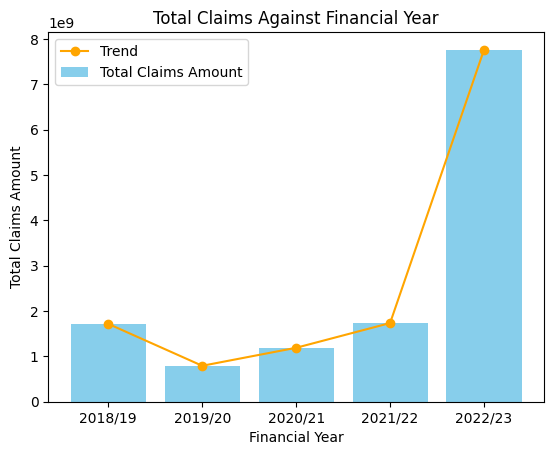

In [ ]:
# Calculate the total claims for each financial year
claims_by_year = inpatient_claims.groupby('origin FY')['Claim Amt'].sum()

# Plot the bar plot
plt.bar(claims_by_year.index, claims_by_year, color='skyblue', label='Total Claims Amount')

# Plot the trend line
plt.plot(claims_by_year.index, claims_by_year, marker='o', color='orange', label='Trend')

# Add labels and title
plt.xlabel('Financial Year')
plt.ylabel('Total Claims Amount')
plt.title('Total Claims Against Financial Year')

# Add legend
plt.legend()

# Show the plot
plt.show()

<Axes: >

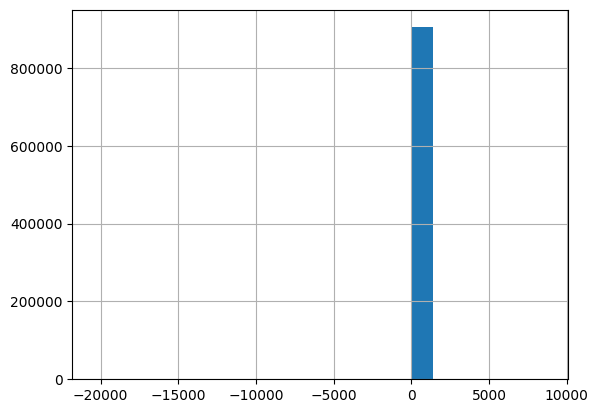

In [ ]:
inpatient_claims['days'].hist(bins=20)

Many ML models prefer a Gaussian or normal distribution. If the distribution isn't normal, we can fix that with:

*   Scaling - min-max scaling
*   Normalization

*   Transformation - box cox, yeo johnson








#Box and whisker plot

<Axes: >

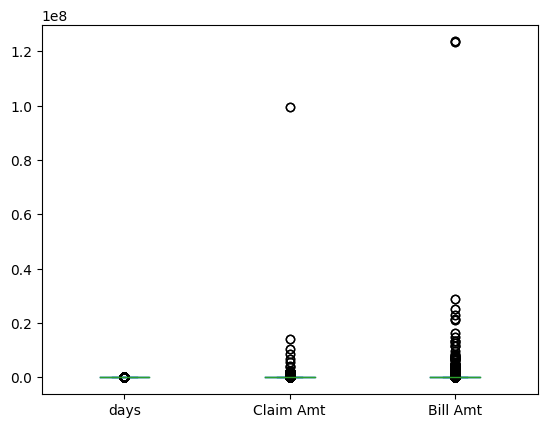

In [ ]:
inpatient_claims.plot(kind="box", layout=(3,3), sharex=False)

<Axes: >

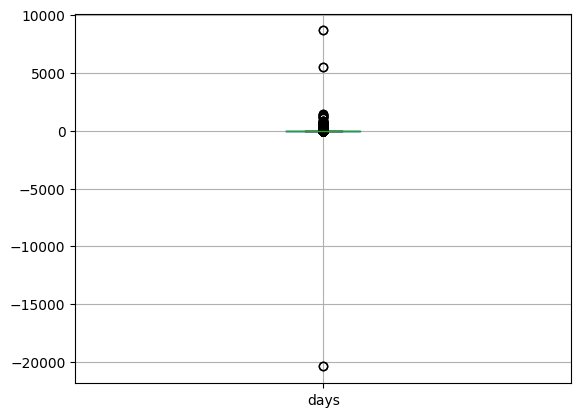

In [ ]:
inpatient_claims.boxplot('days')

Threshold for correlation - z-score, IQR
measures the linear relationship between two variables.

There is negliggible correlation between the claim amount,bill amount and days

What to look for in data


1.   Missing data

*   Impute-mean,mode,median,KNN

2.   Outliers
Detecting - zScore, inter-quartile range, standard deviation
Distribution ==
Gaussian distribution - histogram, density plot, whisker,box
Categorical features - text-like
Encode - one-hot encoding, label encoding
Correlation ==
Detect using correlation matrix, pearson correlation heatmap
Feature selection - curse of dimensionality
PCA








#Dealing with dates

Admission date
The date follows a dd/mm/yyyy format.

Test each date to make sure it's correct

In [ ]:
#Correcting the branch and voucher date column as they were exchanged from row no.452442
inpatient_claims.loc[452442:, 'branch'] = inpatient_claims.loc[452442:, 'voucher date'].values
inpatient_claims

inpatient_claims.loc[452442:, 'voucher date'] = np.nan
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,voucher date,branch,county,Days til notice
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,NaN,K N H BRANCH,NAIROBI,-8011 days
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,NaN,KAKAMEGA BRANCH,KAKAMEGA,-8086 days
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,NaN,THIKA BRANCH,KIAMBU,-8083 days
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,NaN,KISUMU BRANCH,KISUMU,-7337 days
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,NaN,MIGORI BRANCH,MIGORI,-5742 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,NaN,MURANG'A BRANCH,NaN,74 days
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,NaN,MURANG'A BRANCH,NaN,74 days
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,NaN,MURANG'A BRANCH,NaN,106 days
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,NaN,MURANG'A BRANCH,NaN,74 days


In [ ]:
#writing a fumction to return the percentage of nul values in each column
def percent_na(col):
    return(col.isna().sum()/len(inpatient_claims))

inpatient_claims.apply(percent_na)

r/ship             0.000000
hcp name           0.000000
hcp cat            0.000000
hcp level          0.003667
admission date     0.000000
discharge date     0.003989
days               0.000004
received date      0.000000
origin FY          0.000000
disease            0.040949
status             0.000619
scheme             0.000000
Claim Amt          0.000075
Bill Amt           0.004703
voucher date       0.760692
branch             0.000000
county             0.500000
Days til notice    0.000000
dtype: float64

Dropping voucher date because more than 50% of it is blank

In [ ]:
inpatient_claims = inpatient_claims.drop(columns = ['voucher date'])
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,branch,county,Days til notice
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,NAIROBI,-8011 days
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8086 days
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,KIAMBU,-8083 days
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,KISUMU,-7337 days
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,MIGORI,-5742 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,106 days
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days


In [ ]:
inpatient_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904884 entries, 0 to 904883
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   r/ship           904884 non-null  object         
 1   hcp name         904884 non-null  object         
 2   hcp cat          904884 non-null  object         
 3   hcp level        901566 non-null  object         
 4   admission date   904884 non-null  object         
 5   discharge date   901274 non-null  object         
 6   days             904880 non-null  float64        
 7   received date    904884 non-null  object         
 8   origin FY        904884 non-null  object         
 9   disease          867830 non-null  object         
 10  status           904324 non-null  object         
 11  scheme           904884 non-null  object         
 12  Claim Amt        904816 non-null  float64        
 13  Bill Amt         900628 non-null  float64        
 14  bran

In [ ]:
def print_arr(arr):
  for x in arr:
    print(x)

In [ ]:
try:
    inpatient_claims['admission date'] = pd.to_datetime(inpatient_claims['admission date'], format='%d/%m/%Y', errors='raise')
    print("All dates are valid.")
except ValueError as e:
    print("Error:", e)
inpatient_claims

All dates are valid.


,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,branch,county,Days til notice
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,2020-08-08,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,NAIROBI,-8011 days
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,2021-06-12,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8086 days
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,2020-10-21,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,KIAMBU,-8083 days
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,2018-10-04,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,KISUMU,-7337 days
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,2018-08-25,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,MIGORI,-5742 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,2023-05-18,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,2023-05-18,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,2023-04-14,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,106 days
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,2023-05-18,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days


In [ ]:
inpatient_claims['admission_day'] = inpatient_claims['admission date'].dt.day
inpatient_claims['admission_month'] = inpatient_claims['admission date'].dt.month
inpatient_claims['admission_year'] = inpatient_claims['admission date'].dt.year
inpatient_claims = inpatient_claims.drop(columns=['admission date'])
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,branch,county,Days til notice,admission_day,admission_month,admission_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,NAIROBI,-8011 days,8,8,2020
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8086 days,12,6,2021
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,KIAMBU,-8083 days,21,10,2020
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,KISUMU,-7337 days,4,10,2018
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,MIGORI,-5742 days,25,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,106 days,14,4,2023
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023


In [ ]:
try:
    inpatient_claims['discharge date'] = pd.to_datetime(inpatient_claims['discharge date'], format='%d/%m/%Y', errors='raise')
    print("All discharge dates are valid.")
except ValueError as e:
    print("Error:", e)
inpatient_claims

Error: Out of bounds nanosecond timestamp: 19-03-03 00:00:00, at position 317. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


,r/ship,hcp name,hcp cat,hcp level,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,branch,county,Days til notice,admission_day,admission_month,admission_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,NAIROBI,-8011 days,8,8,2020
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8086 days,12,6,2021
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,KIAMBU,-8083 days,21,10,2020
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,KISUMU,-7337 days,4,10,2018
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,MIGORI,-5742 days,25,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,106 days,14,4,2023
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023


In [ ]:
inpatient_claims['discharge date'].iloc[471483]

'03/03/2019'

Changing the date that caused an error to the correct format

In [ ]:
date_string = '19-03-03'
datetime_object = pd.to_datetime(date_string, format='%d-%m-%y')
print(datetime_object)

2003-03-19 00:00:00


using errors=coerce instead of ignore to coerce any problematic values to NaT(not a time) which will make it easier to identify them

In [ ]:
inpatient_claims['discharge date'] = pd.to_datetime(inpatient_claims['discharge date'], format='%d/%m/%Y', errors='coerce')

print(inpatient_claims['discharge date'].dtype)

datetime64[ns]


In [ ]:
 inpatient_claims['discharge date'] = pd.to_datetime(inpatient_claims['discharge date'], format='%d/%m/%Y', errors='ignore')
 inpatient_claims['discharge_day'] = inpatient_claims['discharge date'].dt.day
 inpatient_claims['discharge_month'] = inpatient_claims['discharge date'].dt.month
 inpatient_claims['discharge_year'] = inpatient_claims['discharge date'].dt.year
 inpatient_claims = inpatient_claims.drop(columns=['discharge date'])
 inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,days,received date,origin FY,disease,status,scheme,...,Bill Amt,branch,county,Days til notice,admission_day,admission_month,admission_year,discharge_day,discharge_month,discharge_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,0.0,02/09/1998,2020/21,C20,U,RETIREES,...,8000.0,K N H BRANCH,NAIROBI,-8011 days,8,8,2020,8.0,8.0,2020.0
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,1.0,23/04/1999,2020/21,J18.9,RH,NHS,...,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8086 days,12,6,2021,13.0,6.0,2021.0
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,4.0,04/09/1998,2020/21,K63.9,AA,NHS,...,50000.0,THIKA BRANCH,KIAMBU,-8083 days,21,10,2020,25.0,10.0,2020.0
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,3.0,02/09/1998,2018/19,A49,RA,Blank,...,3600.0,KISUMU BRANCH,KISUMU,-7337 days,4,10,2018,7.0,10.0,2018.0
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,0.0,05/12/2002,2018/19,O80.0,RA,NHS,...,3439.0,MIGORI BRANCH,MIGORI,-5742 days,25,8,2018,25.0,8.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,106 days,14,4,2023,14.0,4.0,2023.0
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0


converting discharge dates(day, month,year) to numeric values

In [ ]:
inpatient_claims['discharge_day'] = inpatient_claims['discharge_day'].apply(pd.to_numeric, errors='coerce')
inpatient_claims['discharge_month'] = inpatient_claims['discharge_month'].apply(pd.to_numeric, errors='coerce')
inpatient_claims['discharge_year'] = inpatient_claims['discharge_year'].apply(pd.to_numeric, errors='coerce')

In [ ]:
inpatient_claims.head()

,r/ship,hcp name,hcp cat,hcp level,days,received date,origin FY,disease,status,scheme,...,Bill Amt,branch,county,Days til notice,admission_day,admission_month,admission_year,discharge_day,discharge_month,discharge_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,0.0,02/09/1998,2020/21,C20,U,RETIREES,...,8000.0,K N H BRANCH,NAIROBI,-8011 days,8,8,2020,8.0,8.0,2020.0
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,1.0,23/04/1999,2020/21,J18.9,RH,NHS,...,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8086 days,12,6,2021,13.0,6.0,2021.0
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,4.0,04/09/1998,2020/21,K63.9,AA,NHS,...,50000.0,THIKA BRANCH,KIAMBU,-8083 days,21,10,2020,25.0,10.0,2020.0
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,3.0,02/09/1998,2018/19,A49,RA,Blank,...,3600.0,KISUMU BRANCH,KISUMU,-7337 days,4,10,2018,7.0,10.0,2018.0
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,0.0,05/12/2002,2018/19,O80.0,RA,NHS,...,3439.0,MIGORI BRANCH,MIGORI,-5742 days,25,8,2018,25.0,8.0,2018.0


In [ ]:
try:
    inpatient_claims['received date'] = pd.to_datetime(inpatient_claims['received date'], format='%d/%m/%Y', errors='raise')
    print("All received dates are valid.")
except ValueError as e:
    print("Error:", e)
inpatient_claims

All received dates are valid.


,r/ship,hcp name,hcp cat,hcp level,days,received date,origin FY,disease,status,scheme,...,Bill Amt,branch,county,Days til notice,admission_day,admission_month,admission_year,discharge_day,discharge_month,discharge_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,0.0,1998-09-02,2020/21,C20,U,RETIREES,...,8000.0,K N H BRANCH,NAIROBI,-8011 days,8,8,2020,8.0,8.0,2020.0
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,1.0,1999-04-23,2020/21,J18.9,RH,NHS,...,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8086 days,12,6,2021,13.0,6.0,2021.0
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,4.0,1998-09-04,2020/21,K63.9,AA,NHS,...,50000.0,THIKA BRANCH,KIAMBU,-8083 days,21,10,2020,25.0,10.0,2020.0
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,3.0,1998-09-02,2018/19,A49,RA,Blank,...,3600.0,KISUMU BRANCH,KISUMU,-7337 days,4,10,2018,7.0,10.0,2018.0
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,0.0,2002-12-05,2018/19,O80.0,RA,NHS,...,3439.0,MIGORI BRANCH,MIGORI,-5742 days,25,8,2018,25.0,8.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2023-07-31,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2023-07-31,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,0.0,2023-07-29,2022/23,O80.0,AA,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,106 days,14,4,2023,14.0,4.0,2023.0
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2023-07-31,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0


In [ ]:
inpatient_claims['received_day'] = inpatient_claims['received date'].dt.day
inpatient_claims['received_month'] = inpatient_claims['received date'].dt.month
inpatient_claims['received_year'] = inpatient_claims['received date'].dt.year
inpatient_claims = inpatient_claims.drop(columns=['received date'])
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,days,origin FY,disease,status,scheme,Claim Amt,...,Days til notice,admission_day,admission_month,admission_year,discharge_day,discharge_month,discharge_year,received_day,received_month,received_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,0.0,2020/21,C20,U,RETIREES,16000.0,...,-8011 days,8,8,2020,8.0,8.0,2020.0,2,9,1998
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,1.0,2020/21,J18.9,RH,NHS,1800.0,...,-8086 days,12,6,2021,13.0,6.0,2021.0,23,4,1999
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,4.0,2020/21,K63.9,AA,NHS,50000.0,...,-8083 days,21,10,2020,25.0,10.0,2020.0,4,9,1998
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,3.0,2018/19,A49,RA,Blank,3600.0,...,-7337 days,4,10,2018,7.0,10.0,2018.0,2,9,1998
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,0.0,2018/19,O80.0,RA,NHS,17000.0,...,-5742 days,25,8,2018,25.0,8.0,2018.0,5,12,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,...,74 days,18,5,2023,19.0,5.0,2023.0,31,7,2023
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,...,74 days,18,5,2023,19.0,5.0,2023.0,31,7,2023
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,0.0,2022/23,O80.0,AA,LINDA MAMA,5000.0,...,106 days,14,4,2023,14.0,4.0,2023.0,29,7,2023
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,...,74 days,18,5,2023,19.0,5.0,2023.0,31,7,2023


#One hot encoding and label ecoding

Financial year

In [ ]:
financial_years = inpatient_claims['origin FY'].unique()
print(f'Number of distinct financial years: {len(financial_years)}')
for x in financial_years:
  print(x)

Number of distinct financial years: 5
2020/21
2018/19
2022/23
2019/20
2021/22


Since we have 5 discrete financial years, and they are numeric, we can leave them as is.


#Relationship:


In [ ]:
print_arr(inpatient_claims['r/ship'].unique())


M
D
S


M-Member

D-Dependent(children)

S-spouse

Lbel encoding the R/ship


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the 'relationship' column
inpatient_claims['r/ship_encoded'] = label_encoder.fit_transform(inpatient_claims['r/ship'])

#store the mapping of original labels to encoded labels
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping of original labels to encoded labels:")
print(mapping)

Mapping of original labels to encoded labels:
{'D': 0, 'M': 1, 'S': 2}


#Hospital category

In [ ]:
print_arr(inpatient_claims['hcp cat'].unique())

G
M
P


Abbreviated values:

| Abbreviation | Full |
| --- | --- |
| G | Government hospital |
| M | Mission hospital |
| P | Private hospital |

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
inpatient_claims['hcp cat_encoded']=label_encoder.fit_transform(inpatient_claims['hcp cat'])

#store the mapping of original labels to encoded labels
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping of original labels to encoded labels:")
print(mapping)

Mapping of original labels to encoded labels:
{'G': 0, 'M': 1, 'P': 2}


In [ ]:
print_arr(inpatient_claims['hcp name'].unique())

KENYATTA NATIONAL HOSPITAL (GENERAL WARD
FRIENDS KAIMOSI HOSPITAL
ST. MATIA MULUMBA HOSPITAL
THE PORT FLORENCE COMMUNITY HOSPITAL
ST. ROBERT SILVER MATERNITY & NURSING
MOMBASA HOSPITAL ASSOCIATION
COAST GENERAL HOSPITAL (MOMBASA)
NAZARETH HOSPITAL  RIARA RIDGE
THE KITUI MATERNITY & NURSING HOME
A.I.C KAPSOWAR HOSPITAL (ELDORET)
MARAGUA DISTRICT HOSPITAL
THE LIGHT NAIVASHA DOCTORS PLAZA
LADY GRIGGS MATERNITY HOSPITAL
S.S. LEAGUE M.P SHAH HOSPITAL  NAIROBI
MAMA LUCY KIBAKI HOSPITAL
ITEN COUNTY REFERAL HOSPITAL
NAIROBI WOMEN'S HOSPITAL KITENGELA MEDICAL CLINIC
H.H AGA KHAN DISP. & MAT. HOSPITAL KISUM
BENMAC HEALTH CLINIC
VINEYARD HOSPITAL
NAIROBI WEST HOSPITAL
ST.TERESA HOSPITAL KIAMBU
CONSOLATA HOSPITAL (NYERI)
NORTH KINANGOP CATHOLIC HOSPITAL
KAPENGURIA DISTRICT HOSPITAL
EMBU LEVEL 5 HOSPITAL
ST. MARY'S HOSPITAL (MUMIAS)
ATHI-RIVER SHALOM COMMUNITY HOSPITAL
A.I.C. LITEIN COTTAGE HOSPITAL KERICHO
ST. CLARES MISSION HOSPITAL (KAPLONG)
RIFT VALLEY PROV. GENERAL HOSP. NAKURU
HOLY FAMILY HOS

In [ ]:
inpatient_claims.shape

(904884, 25)

In [ ]:
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,days,origin FY,disease,status,scheme,Claim Amt,...,admission_month,admission_year,discharge_day,discharge_month,discharge_year,received_day,received_month,received_year,r/ship_encoded,hcp cat_encoded
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,0.0,2020/21,C20,U,RETIREES,16000.0,...,8,2020,8.0,8.0,2020.0,2,9,1998,1,0
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,1.0,2020/21,J18.9,RH,NHS,1800.0,...,6,2021,13.0,6.0,2021.0,23,4,1999,1,1
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,4.0,2020/21,K63.9,AA,NHS,50000.0,...,10,2020,25.0,10.0,2020.0,4,9,1998,1,1
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,3.0,2018/19,A49,RA,Blank,3600.0,...,10,2018,7.0,10.0,2018.0,2,9,1998,0,2
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,0.0,2018/19,O80.0,RA,NHS,17000.0,...,8,2018,25.0,8.0,2018.0,5,12,2002,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,...,5,2023,19.0,5.0,2023.0,31,7,2023,1,0
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,...,5,2023,19.0,5.0,2023.0,31,7,2023,1,0
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,0.0,2022/23,O80.0,AA,LINDA MAMA,5000.0,...,4,2023,14.0,4.0,2023.0,29,7,2023,1,0
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,...,5,2023,19.0,5.0,2023.0,31,7,2023,1,0


In [ ]:
inpatient_claims = inpatient_claims.drop(columns=['r/ship','hcp cat'])
inpatient_claims

,hcp name,hcp level,days,origin FY,disease,status,scheme,Claim Amt,Bill Amt,branch,...,admission_month,admission_year,discharge_day,discharge_month,discharge_year,received_day,received_month,received_year,r/ship_encoded,hcp cat_encoded
0,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,6,0.0,2020/21,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,...,8,2020,8.0,8.0,2020.0,2,9,1998,1,0
1,FRIENDS KAIMOSI HOSPITAL,NaN,1.0,2020/21,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,...,6,2021,13.0,6.0,2021.0,23,4,1999,1,1
2,ST. MATIA MULUMBA HOSPITAL,4,4.0,2020/21,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,...,10,2020,25.0,10.0,2020.0,4,9,1998,1,1
3,THE PORT FLORENCE COMMUNITY HOSPITAL,4,3.0,2018/19,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,...,10,2018,7.0,10.0,2018.0,2,9,1998,0,2
4,ST. ROBERT SILVER MATERNITY & NURSING,NaN,0.0,2018/19,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,...,8,2018,25.0,8.0,2018.0,5,12,2002,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,...,5,2023,19.0,5.0,2023.0,31,7,2023,1,0
904880,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,...,5,2023,19.0,5.0,2023.0,31,7,2023,1,0
904881,MURIRANJA DISTRICT HOSPITAL,4,0.0,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,...,4,2023,14.0,4.0,2023.0,29,7,2023,1,0
904882,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,...,5,2023,19.0,5.0,2023.0,31,7,2023,1,0


In [ ]:
#50% of counties is blank
inpatient_claims = inpatient_claims.drop(columns = ['county'])
inpatient_claims.shape

(904884, 22)

In [ ]:
inpatient_claims.columns

Index(['hcp name', 'hcp level', 'days', 'origin FY', 'disease', 'status',
       'scheme', 'Claim Amt', 'Bill Amt', 'branch', 'Days til notice',
       'admission_day', 'admission_month', 'admission_year', 'discharge_day',
       'discharge_month', 'discharge_year', 'received_day', 'received_month',
       'received_year', 'r/ship_encoded', 'hcp cat_encoded'],
      dtype='object')

In [ ]:
print_arr(inpatient_claims['scheme'].unique())

RETIREES
NHS
Blank
COUNTIES
LINDA MAMA
NPS/KPS
CIVIL SERVANTS
EDUAFYA
HISP
PARASTATALS
NHIF STAFF
OPSD
UHC
KANGATA CARE


In [ ]:
label_encoder = LabelEncoder()
inpatient_claims['scheme_encoded'] = label_encoder.fit_transform(inpatient_claims['scheme'])

#store the mapping of original labels to encoded labels
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping of original labels to encoded labels:")
print(mapping)

Mapping of original labels to encoded labels:
{'Blank': 0, 'CIVIL SERVANTS': 1, 'COUNTIES': 2, 'EDUAFYA': 3, 'HISP': 4, 'KANGATA CARE': 5, 'LINDA MAMA': 6, 'NHIF STAFF': 7, 'NHS': 8, 'NPS/KPS': 9, 'OPSD': 10, 'PARASTATALS': 11, 'RETIREES': 12, 'UHC': 13}


In [ ]:
inpatient_claims=inpatient_claims.drop(columns=['scheme'])
inpatient_claims

,hcp name,days,origin FY,disease,status,Claim Amt,Bill Amt,branch,Days til notice,admission_day,...,discharge_day,discharge_month,discharge_year,received_day,received_month,received_year,r/ship_encoded,hcp cat_encoded,scheme_encoded,hcp level_encoded
0,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,0.0,2020/21,C20,U,16000.0,8000.0,K N H BRANCH,-8011 days,8,...,8.0,8.0,2020.0,2,9,1998,1,0,12,7
1,FRIENDS KAIMOSI HOSPITAL,1.0,2020/21,J18.9,RH,1800.0,77330.0,KAKAMEGA BRANCH,-8086 days,12,...,13.0,6.0,2021.0,23,4,1999,1,1,8,10
2,ST. MATIA MULUMBA HOSPITAL,4.0,2020/21,K63.9,AA,50000.0,50000.0,THIKA BRANCH,-8083 days,21,...,25.0,10.0,2020.0,4,9,1998,1,1,8,4
3,THE PORT FLORENCE COMMUNITY HOSPITAL,3.0,2018/19,A49,RA,3600.0,3600.0,KISUMU BRANCH,-7337 days,4,...,7.0,10.0,2018.0,2,9,1998,0,2,0,4
4,ST. ROBERT SILVER MATERNITY & NURSING,0.0,2018/19,O80.0,RA,17000.0,3439.0,MIGORI BRANCH,-5742 days,25,...,25.0,8.0,2018.0,5,12,2002,1,2,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,KIRWARA SUB-DISTRICT HOSPITAL,1.0,2022/23,O80.0,AP,5000.0,5000.0,MURANG'A BRANCH,74 days,18,...,19.0,5.0,2023.0,31,7,2023,1,0,6,4
904880,KIRWARA SUB-DISTRICT HOSPITAL,1.0,2022/23,O80.0,AP,5000.0,5000.0,MURANG'A BRANCH,74 days,18,...,19.0,5.0,2023.0,31,7,2023,1,0,6,4
904881,MURIRANJA DISTRICT HOSPITAL,0.0,2022/23,O80.0,AA,5000.0,5000.0,MURANG'A BRANCH,106 days,14,...,14.0,4.0,2023.0,29,7,2023,1,0,6,4
904882,KIRWARA SUB-DISTRICT HOSPITAL,1.0,2022/23,O80.0,AP,5000.0,5000.0,MURANG'A BRANCH,74 days,18,...,19.0,5.0,2023.0,31,7,2023,1,0,6,4


In [ ]:
label_encoder = LabelEncoder()
inpatient_claims['hcp level_encoded'] = label_encoder.fit_transform(inpatient_claims['hcp level'])

#store the mapping of original labels to encoded labels
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping of original labels to encoded labels:")
print(mapping)

Mapping of original labels to encoded labels:
{'2': 0, '3': 1, '3A': 2, '3B': 3, '4': 4, '4B': 5, '5': 6, '6': 7, '6B': 8, 'N': 9, nan: 10}


In [ ]:
inpatient_claims=inpatient_claims.drop(columns=['hcp level'])
inpatient_claims

,hcp name,days,origin FY,disease,status,scheme,Claim Amt,Bill Amt,branch,Days til notice,...,discharge_day,discharge_month,discharge_year,received_day,received_month,received_year,r/ship_encoded,hcp cat_encoded,scheme_encoded,hcp level_encoded
0,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,0.0,2020/21,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,-8011 days,...,8.0,8.0,2020.0,2,9,1998,1,0,12,7
1,FRIENDS KAIMOSI HOSPITAL,1.0,2020/21,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,-8086 days,...,13.0,6.0,2021.0,23,4,1999,1,1,8,10
2,ST. MATIA MULUMBA HOSPITAL,4.0,2020/21,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,-8083 days,...,25.0,10.0,2020.0,4,9,1998,1,1,8,4
3,THE PORT FLORENCE COMMUNITY HOSPITAL,3.0,2018/19,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,-7337 days,...,7.0,10.0,2018.0,2,9,1998,0,2,0,4
4,ST. ROBERT SILVER MATERNITY & NURSING,0.0,2018/19,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,-5742 days,...,25.0,8.0,2018.0,5,12,2002,1,2,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,KIRWARA SUB-DISTRICT HOSPITAL,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,74 days,...,19.0,5.0,2023.0,31,7,2023,1,0,6,4
904880,KIRWARA SUB-DISTRICT HOSPITAL,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,74 days,...,19.0,5.0,2023.0,31,7,2023,1,0,6,4
904881,MURIRANJA DISTRICT HOSPITAL,0.0,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,106 days,...,14.0,4.0,2023.0,29,7,2023,1,0,6,4
904882,KIRWARA SUB-DISTRICT HOSPITAL,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,74 days,...,19.0,5.0,2023.0,31,7,2023,1,0,6,4


In [ ]:
inpatient_claims.columns

Index(['hcp name', 'days', 'origin FY', 'disease', 'status', 'Claim Amt',
       'Bill Amt', 'branch', 'Days til notice', 'admission_day',
       'admission_month', 'admission_year', 'discharge_day', 'discharge_month',
       'discharge_year', 'received_day', 'received_month', 'received_year',
       'r/ship_encoded', 'hcp cat_encoded', 'scheme_encoded',
       'hcp level_encoded'],
      dtype='object')

# Isolation Forest

First step is imputing missing values using KNN imputer


In [ ]:
xtrain = inpatient_claims[['days','Claim Amt','Bill Amt','Days til notice','admission_month','discharge_month','received_month','admission_day','discharge_day','received_day','r/ship_encoded','hcp cat_encoded','scheme_encoded','hcp level_encoded']]


In [ ]:
xtrain.isna().sum()

days                    4
Claim Amt              68
Bill Amt             4256
Days til notice         0
admission_month         0
discharge_month      3612
received_month          0
admission_day           0
discharge_day        3612
received_day            0
r/ship_encoded          0
hcp cat_encoded         0
scheme_encoded          0
hcp level_encoded       0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data, replacing missing values
days_imputed = imputer.fit_transform(xtrain[['days']])

# Replace the original column with imputed values
xtrain['days'] = days_imputed

<ipython-input-108-52ff80d00888>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['days'] = days_imputed


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data, replacing missing values
claim_imputed = imputer.fit_transform(xtrain[['Claim Amt']])

# Replace the original column with imputed values
xtrain['Claim Amt'] = claim_imputed

<ipython-input-109-6cc5449387e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['Claim Amt'] = claim_imputed


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data, replacing missing values
Bill_imputed = imputer.fit_transform(xtrain[['Bill Amt']])

# Replace the original column with imputed values
xtrain['Bill Amt'] = Bill_imputed

<ipython-input-110-d82871a790b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['Bill Amt'] = Bill_imputed


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data, replacing missing values
discharge_month_imputed = imputer.fit_transform(xtrain[['discharge_month']])

# Replace the original column with imputed values
xtrain['discharge_month'] = discharge_month_imputed

<ipython-input-112-0b5c89055061>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['discharge_month'] = discharge_month_imputed


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data, replacing missing values
discharge_day_imputed = imputer.fit_transform(xtrain[['discharge_day']])

# Replace the original column with imputed values
xtrain['discharge_day'] = discharge_day_imputed

<ipython-input-113-86b8f95825d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['discharge_day'] = discharge_day_imputed


In [ ]:
xtrain.isna().sum()

days                 0
Claim Amt            0
Bill Amt             0
Days til notice      0
admission_month      0
discharge_month      0
received_month       0
admission_day        0
discharge_day        0
received_day         0
r/ship_encoded       0
hcp cat_encoded      0
scheme_encoded       0
hcp level_encoded    0
dtype: int64

In [ ]:
xtrain.dtypes

days                         float64
Claim Amt                    float64
Bill Amt                     float64
Days til notice      timedelta64[ns]
admission_month                int32
discharge_month              float64
received_month                 int32
admission_day                  int32
discharge_day                float64
received_day                   int32
r/ship_encoded                 int64
hcp cat_encoded                int64
scheme_encoded                 int64
hcp level_encoded              int64
dtype: object

In [ ]:
xtrain['Days til notice'] = xtrain['Days til notice'].astype(int)
xtrain['days'] = xtrain['days'].astype(int)
xtrain['Claim Amt'] = xtrain['Claim Amt'].astype(int)
xtrain['Bill Amt'] = xtrain['Bill Amt'].astype(int)
xtrain['discharge_month'] = xtrain['discharge_month'].astype(int)
xtrain['discharge_day'] = xtrain['discharge_day'].astype(int)
xtrain.dtypes

<ipython-input-116-e38ca079fa9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['Days til notice'] = xtrain['Days til notice'].astype(int)
<ipython-input-116-e38ca079fa9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['days'] = xtrain['days'].astype(int)
<ipython-input-116-e38ca079fa9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

days                 int64
Claim Amt            int64
Bill Amt             int64
Days til notice      int64
admission_month      int32
discharge_month      int64
received_month       int32
admission_day        int32
discharge_day        int64
received_day         int32
r/ship_encoded       int64
hcp cat_encoded      int64
scheme_encoded       int64
hcp level_encoded    int64
dtype: object

In [ ]:
# Train Isolation Forest model
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators = 150,contamination=0.01, random_state=42)
model.fit(xtrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, n_estimators=150, random_state=42)

In [ ]:
# Predict outliers
model.fit(xtrain)
xtrain['anomaly'] = model.predict(xtrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-124-657cdd4fbb13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['anomaly'] = model.predict(xtrain)


In [ ]:
xtrain['anomaly_score'] = model.decision_function(xtrain)

<ipython-input-118-51fb3c455695>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['anomaly_score'] = model.decision_function(xtrain)


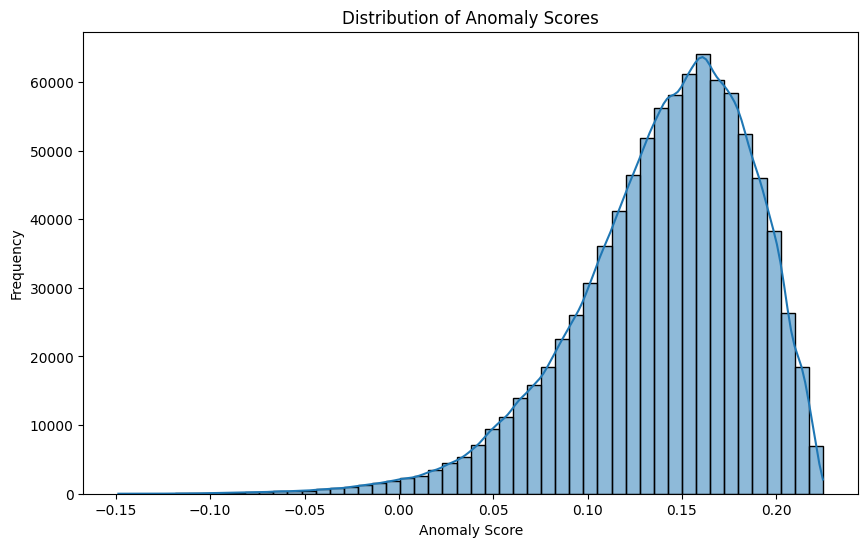

In [ ]:
# Visualize anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(xtrain['anomaly_score'], bins=50, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Check for potential fraud cases
potential_fraud = xtrain[xtrain['anomaly'] == -1]
print("Potential fraud cases:")
print(potential_fraud[xtrain + ['anomaly_score']])

Potential fraud cases:


ValueError: Unable to coerce to Series, length must be 16: given 1

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain, xtrain['anomaly'], test_size=0.2, random_state=42)

# Train a classifier for evaluation
clf = IsolationForest(contamination = 0.01,random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99      1753
           1       1.00      1.00      1.00    179224

    accuracy                           1.00    180977
   macro avg       1.00      0.99      1.00    180977
weighted avg       1.00      1.00      1.00    180977



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xtrain, xtrain['anomaly'], test_size=0.2, random_state=42)

# Train a classifier for evaluation
clf = IsolationForest(contamination = 0.1,random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

          -1       0.10      1.00      0.18      1753
           1       1.00      0.91      0.95    179224

    accuracy                           0.91    180977
   macro avg       0.55      0.96      0.57    180977
weighted avg       0.99      0.91      0.95    180977



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming clf is your classifier and X_test, y_test are your testing set
# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9118672538499367
Precision: 1.0
Recall: 0.9110052225148417
F1-score: 0.9534303849949488


#Deploying IF

In [ ]:
# saving the model
import pickle
pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [ ]:
# installing pyngrok
!pip install -q pyngrok

In [ ]:
# installing streamlit
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
xtrain.columns

Index(['days', 'Claim Amt', 'Bill Amt', 'Days til notice', 'admission_month',
       'discharge_month', 'received_month', 'admission_day', 'discharge_day',
       'received_day', 'r/ship_encoded', 'hcp cat_encoded', 'scheme_encoded',
       'hcp level_encoded', 'anomaly_score', 'anomaly'],
      dtype='object')

In [ ]:
# importing required libraries
import pickle
import streamlit as st

# loading the trained model
pickle_in = open('classifier.pkl', 'rb')
classifier = pickle.load(pickle_in)

# this is the main function in which we define our app
def main():
    # header of the page
    html_temp = """
    <div style ="background-color:lightblue;padding:13px">
    <h1 style ="color:black;text-align:center;">Check Claim Eligibility</h1>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html = True)

    # following lines create boxes in which user can enter data required to make prediction
    days = st.number_input("Days Admitted")
    Days_til_notice = st.number_input("Days till notice")
    admission_day = st.number_input("Admission Day")
    admission_month = st.selectbox("Admission Month", ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
    discharge_day = st.number_input("Discharge Day")
    discharge_month = st.selectbox("Discharge Month", ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
    received_month = st.selectbox("Received Month", ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
    received_day = st.number_input("Received Day")
    relationship_encoded = st.selectbox('Relationship', ['M', 'D', 'S'])
    scheme_encoded = st.selectbox('Scheme', ["NHS", "OPSD", "Unknown", "NPS/KPS", "LINDA MAMA", "HISP", "EDUAFYA", "COUNTIES", "CIVIL SERVANTS", "PARASTATALS", "NHIF STAFF", "RETIREES", "Kangata care"])
    hcp_cat_encoded = st.selectbox('HCP Category', ["Government", "Mission", "Private"])
    hcp_level_encoded = st.selectbox('HCP Level', ["3", "5", "2", "4", "6", "3A", "3B", "6B", "4B"])
    Claim_Amt = st.number_input("Claim Amount in KES")
    Bill_Amt = st.number_input("Bill Amount in KES")
    result =""

    # when 'Check' is clicked, make the prediction and store it
    if st.button("Check"):
        result = prediction(days, admission_month, discharge_day, discharge_month, received_month, received_day, admission_day, Claim_Amt, Bill_Amt, scheme_encoded, Days_til_notice, relationship_encoded, hcp_cat_encoded, hcp_level_encoded)
        st.success('{} this claim'.format(result))

# defining the function which will make the prediction using the data which the user inputs
def prediction(days, admission_month, discharge_day, discharge_month, received_month, received_day, admission_day, Claim_Amt, Bill_Amt, scheme_encoded, Days_til_notice, relationship_encoded, hcp_cat_encoded, hcp_level_encoded):
    # 3. Building the model to automate Anomalies Eligibility
    prediction = classifier.predict([[days, admission_month, discharge_day, discharge_month, received_month, received_day, admission_day, Claim_Amt, Bill_Amt, scheme_encoded, Days_til_notice, relationship_encoded, hcp_cat_encoded, hcp_level_encoded]])

    if prediction == -1:
        pred = 'Investigate'
    else:
        pred = 'Accept'
    return pred

if __name__=='__main__':
    main()


In [ ]:
# running the app
!streamlit run app.py &>/dev/null&

In [ ]:
# making the locally-hosted web application to be publicly accessible
from pyngrok import ngrok
ngrok.set_auth_token("2e0F7Had3B1w3JAMcT3xO60bmkb_tR3G2cTXvFuLuVsp7XSB")

public_url = ngrok.connect('8501')
public_url

<NgrokTunnel: "https://b408-34-86-171-193.ngrok-free.app" -> "http://localhost:8501">

#Analysis


In [ ]:
# Find the indices of rows classified as anomalies (-1)
anomaly_indices = np.where(y_pred == -1)[0]

# Extract the rows from the initial dataset corresponding to these indices
anomalies_in_initial_dataset = inpatient_claims.iloc[anomaly_indices]

# Print the rows classified as anomalies in the initial dataset
anomalies_in_initial_dataset_df = pd.DataFrame(anomalies_in_initial_dataset)
print(anomalies_in_initial_dataset_df)

                                                 hcp name hcp level  days  \
1                                FRIENDS KAIMOSI HOSPITAL       NaN   1.0   
8                      THE KITUI MATERNITY & NURSING HOME        3B   2.0   
28                       THE LIGHT NAIVASHA DOCTORS PLAZA        3B   4.0   
34      NAIROBI WOMEN'S HOSPITAL KITENGELA MEDICAL CLINIC         4   5.0   
36                                   BENMAC HEALTH CLINIC        3B   1.0   
...                                                   ...       ...   ...   
180945                          NAIROBI HOSPITAL  NAIROBI        6B   0.0   
180947                          NAIROBI HOSPITAL  NAIROBI        6B   0.0   
180948                          NAIROBI HOSPITAL  NAIROBI        6B   0.0   
180952                                   ELDORET HOSPITAL        6B   0.0   
180962                            ANDERSON MEDICAL CENTRE        3B   0.0   

       disease status          scheme  Claim Amt   Bill Amt  \
1        J18

In [ ]:
anomalies_in_initial_dataset_df.to_csv('IF anomalies.xlsx',index = True)

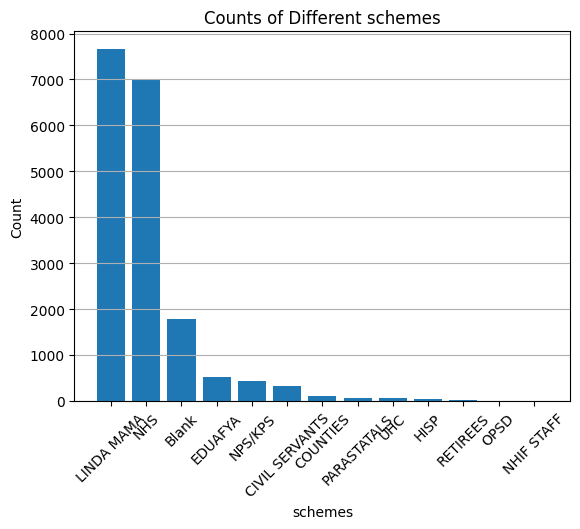

In [ ]:

scheme_anomaly = anomalies_in_initial_dataset_df['scheme'].value_counts()
scheme_anomaly

import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(scheme_anomaly.index, scheme_anomaly.values)
plt.xlabel('schemes')
plt.ylabel('Count')
plt.title('Counts of Different schemes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

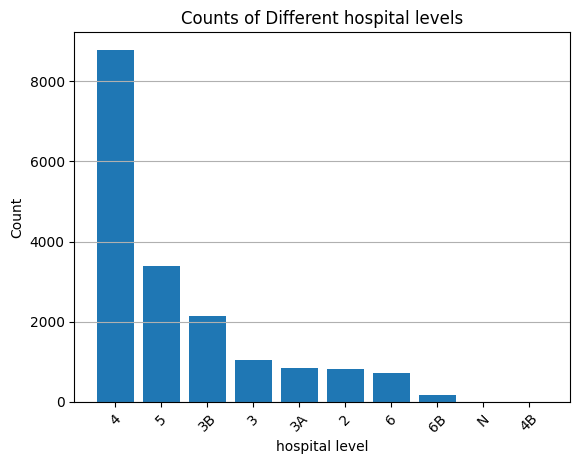

In [ ]:
scheme_anomaly = anomalies_in_initial_dataset_df['hcp level'].value_counts()
scheme_anomaly

import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(scheme_anomaly.index, scheme_anomaly.values)
plt.xlabel('hospital level')
plt.ylabel('Count')
plt.title('Counts of Different hospital levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

In [ ]:
scheme_anomaly = anomalies_in_initial_dataset_df['branch'].value_counts().head(10)
scheme_anomaly

KISUMU BRANCH        1485
MIGORI BRANCH         987
MUMIAS BRANCH         920
UPPER HILL BRANCH     847
HOMA BAY BRANCH       753
KISII BRANCH          719
NAKURU BRANCH         672
KITALE BRANCH         570
SIAYA BRANCH          567
KAKAMEGA BRANCH       529
Name: branch, dtype: int64

In [ ]:
scheme_anomaly = anomalies_in_initial_dataset_df['branch'].value_counts().tail(10)
scheme_anomaly

GIKOMBA BRANCH          16
LOITOKTOK SATELLITE     14
MARALAL BRANCH          14
VOI BRANCH               9
OLENGURUONE SATELLIT     9
MWINGI SATELLITE         6
KIBWEZI SATELLITE        6
MAKINDU SATELLITE        3
ELDAMA RAVINE SATELL     2
WUNDANYI SATELLITE       1
Name: branch, dtype: int64

In [ ]:
scheme_anomaly = anomalies_in_initial_dataset_df['disease'].value_counts()
scheme_anomaly

O80.0    4119
O80      1633
O82.1     487
B50       453
N18       400
         ... 
O75.3       1
S76         1
S66         1
D17.7       1
S93.4       1
Name: disease, Length: 1696, dtype: int64

In [ ]:
scheme_anomaly = anomalies_in_initial_dataset_df['received_month'].value_counts()
scheme_anomaly

11    2426
6     2181
5     1817
2     1698
8     1489
3     1488
1     1296
10    1292
12    1222
9     1208
4     1148
7      812
Name: received_month, dtype: int64

In [ ]:
scheme_anomaly = anomalies_in_initial_dataset_df['days'].value_counts()
scheme_anomaly

0.0       6048
1.0       3242
3.0       1964
2.0       1950
4.0       1487
          ... 
8659.0       1
63.0         1
96.0         1
299.0        1
174.0        1
Name: days, Length: 128, dtype: int64

In [ ]:
scheme_anomaly = anomalies_in_initial_dataset_df['hcp cat_Government hospital'].value_counts()
scheme_anomaly

1    9043
0    9034
Name: hcp cat_Government hospital, dtype: int64

In [ ]:
scheme_anomaly = anomalies_in_initial_dataset_df['hcp cat_Private hospital'].value_counts()
scheme_anomaly

0    11368
1     6709
Name: hcp cat_Private hospital, dtype: int64

In [ ]:
scheme_anomaly = anomalies_in_initial_dataset_df['hcp cat_Mission hospital'].value_counts()
scheme_anomaly

0    15752
1     2325
Name: hcp cat_Mission hospital, dtype: int64

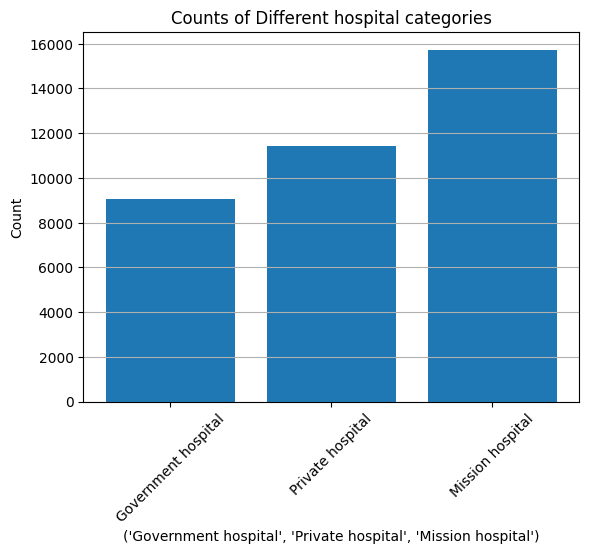

In [ ]:
category = (9072, 11421,15738)
labels = ('Government hospital','Private hospital','Mission hospital')
# Plotting the bar plot
plt.bar(labels, category)
plt.xlabel(labels)
plt.ylabel('Count')
plt.title('Counts of Different hospital categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

              precision    recall  f1-score   support

     anomaly       1.00      0.10      0.18     18077
      normal       0.91      1.00      0.95    162900

    accuracy                           0.91    180977
   macro avg       0.95      0.55      0.57    180977
weighted avg       0.92      0.91      0.88    180977



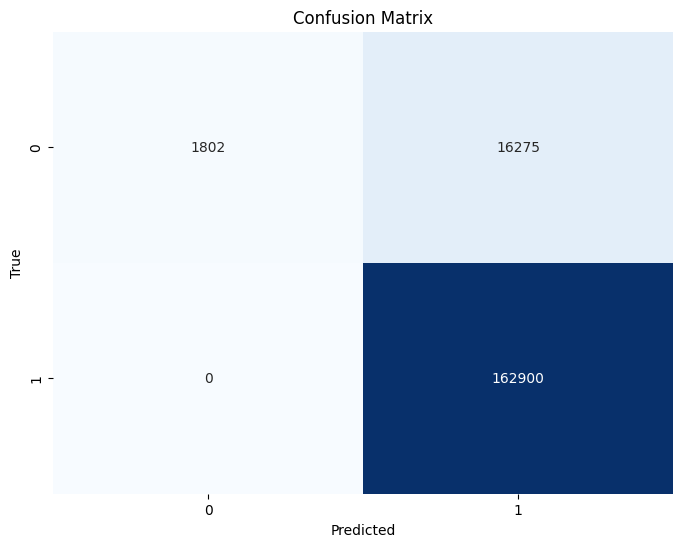

In [ ]:
print(classification_report(y_pred, y_test,target_names=['anomaly','normal']))
cm = confusion_matrix(y_pred, y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Local outlier factor and Grid search CV


In [ ]:
import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs, make_moons
from sklearn.ensemble import IsolationForest
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

In [ ]:
xtrain1 = xtrain.drop(columns = ['anomaly_score','anomaly'])
xtrain1

,days,Claim Amt,Bill Amt,days till notice,admission_month,discharge_month,received_month,admission_day,discharge_day,received_day
0,0,16000,8000,-8216,8,8,9,8,8,2
1,1,1800,77330,-8263,6,6,4,12,13,23
2,4,50000,50000,-8231,10,10,9,21,25,4
3,3,3600,3600,-7365,10,10,9,4,7,2
4,0,17000,3439,-5949,8,8,12,25,25,5
...,...,...,...,...,...,...,...,...,...,...
904879,1,5000,5000,74,5,5,7,18,19,31
904880,1,5000,5000,74,5,5,7,18,19,31
904881,0,5000,5000,106,4,4,7,14,14,29
904882,1,5000,5000,74,5,5,7,18,19,31


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(xtrain1)
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [ ]:
xtrain1.isna().sum()

days                0
Claim Amt           0
Bill Amt            0
days till notice    0
admission_month     0
discharge_month     0
received_month      0
admission_day       0
discharge_day       0
received_day        0
dtype: int64

In [ ]:
xtrain1.dtypes

days                int64
Claim Amt           int64
Bill Amt            int64
days till notice    int64
admission_month     int64
discharge_month     int64
received_month      int64
admission_day       int64
discharge_day       int64
received_day        int64
dtype: object

On the one hand, RobustScaler scales each feature independently by using the interquartile range (IQR) by default, which is the range between the 25th and 75th percentiles of the data. It centers the data by subtracting the median and then scale it by dividing by the IQR. The IQR is robust to outliers: the median and interquartile range are less affected by extreme values than the range, the mean and the standard deviation. Furthermore, RobustScaler does not squash marginal outlier values, contrary to StandardScaler.

On the other hand, MinMaxScaler scales each feature individually such that its range maps into the range between zero and one. If there are outliers in the data, they can skew it towards either the minimum or maximum values, leading to a completely different distribution of data with large marginal outliers: all non-outlier values can be collapsed almost together as a result.

In [ ]:
#fitting the model using the best hyper parameters
clf = LocalOutlierFactor(contamination = 0.01)
clf.fit_predict(xtrain1)
results = clf.negative_outlier_factor_
print(results)

[ -24.39661658  -16.43297363 -145.63003021 ...   -1.17311179   -1.
   -1.        ]


In [ ]:
lof_model = LocalOutlierFactor(contamination=0.01,novelty = False)  # Adjust contamination parameter as needed
outlier_labels = lof_model.fit_predict(xtrain1)

# Add outlier labels to DataFrame
xtrain1['Outlier'] = outlier_labels

print("DataFrame with Outlier Labels:")
print(xtrain1)

DataFrame with Outlier Labels:
        days  Claim Amt  Bill Amt  days till notice  admission_month  \
0          0      16000      8000             -8216                8   
1          1       1800     77330             -8263                6   
2          4      50000     50000             -8231               10   
3          3       3600      3600             -7365               10   
4          0      17000      3439             -5949                8   
...      ...        ...       ...               ...              ...   
904879     1       5000      5000                74                5   
904880     1       5000      5000                74                5   
904881     0       5000      5000               106                4   
904882     1       5000      5000                74                5   
904883     1       5000      5000                74                5   

        discharge_month  received_month  admission_day  discharge_day  \
0                     8        

In [ ]:
xtrain1['Outlier'].value_counts()


 1    895836
-1      9048
Name: Outlier, dtype: int64

In [ ]:
LOFanomalies = inpatient_claims[xtrain1['Outlier'] == -1]

print("Rows with Anomalies:")
print(LOFanomalies)

Rows with Anomalies:
                                      hcp name hcp level  days disease status  \
62           MAAI MAHIU MATERNITY AND HOSPITAL        3B   1.0     O80     AP   
128                      BUKAYA MEDICAL CENTRE        3B   0.0   O80.0     AP   
148       THE NAIROBI WOMEN'S HOSPITAL - ADAMS         4   0.0     R51     UI   
167          KAPSABET COUNTY REFERRAL HOSPITAL         5   0.0     N17     RH   
456                  KEGONGA DISTRICT HOSPITAL         4   1.0   O80.0     AP   
...                                        ...       ...   ...     ...    ...   
904530      RANDBURG COMMUNITY HOSPITAL KISUMU         4   4.0   J20.9     AP   
904742       ST. PAULS EMUSONGA MEDICAL CENTRE        3A   2.0   A01.0     AP   
904772  ST. JOSEPH'S NURSING AND MATERNITY HOM         4   1.0   O80.0     AP   
904794         OLEGURUONE SUBDISTRICT HOSPITAL         4   1.0     O06     AP   
904860           KIRWARA SUB-DISTRICT HOSPITAL         4   1.0   O82.1     AP   

      

In [ ]:
LOFanomalies.to_csv('LOF anomalies.xlsx',index = True)

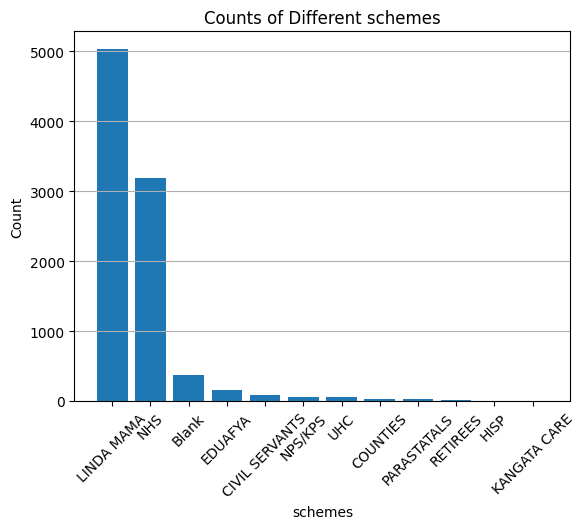

In [ ]:
LOFanomaly = LOFanomalies['scheme'].value_counts()
LOFanomaly

import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(LOFanomaly.index, LOFanomaly.values)
plt.xlabel('schemes')
plt.ylabel('Count')
plt.title('Counts of Different schemes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

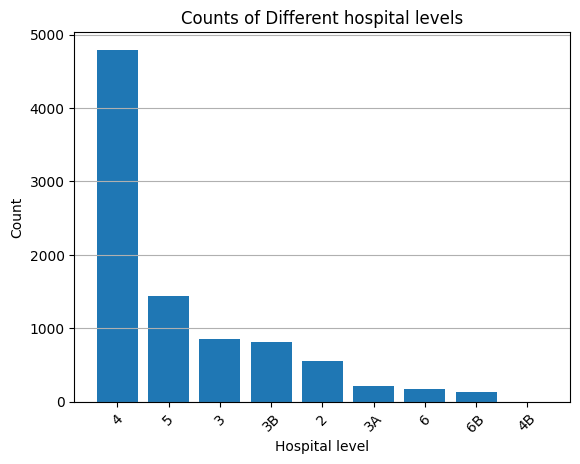

In [ ]:
LOFanomaly = LOFanomalies['hcp level'].value_counts()
LOFanomaly

import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(LOFanomaly.index, LOFanomaly.values)
plt.xlabel('Hospital level')
plt.ylabel('Count')
plt.title('Counts of Different hospital levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

In [ ]:
LOFanomaly = LOFanomalies['branch'].value_counts().head(10)
LOFanomaly

KISUMU BRANCH        700
UPPER HILL BRANCH    586
NAKURU BRANCH        404
MUMIAS BRANCH        352
HOMA BAY BRANCH      302
MIGORI BRANCH        282
BURUBURU BRANCH      268
KERICHO BRANCH       264
KITALE BRANCH        262
KAKAMEGA BRANCH      254
Name: branch, dtype: int64

In [ ]:
LOFanomaly = LOFanomalies['branch'].value_counts().tail(10)
LOFanomaly

GARISSA BRANCH          14
MARALAL BRANCH          14
K N H BRANCH            12
GIKOMBA BRANCH          10
MWINGI SATELLITE         6
WUNDANYI SATELLITE       6
LOITOKTOK SATELLITE      2
ELDAMA RAVINE SATELL     2
KIBWEZI SATELLITE        2
OLENGURUONE SATELLIT     2
Name: branch, dtype: int64

In [ ]:
LOFanomaly = LOFanomalies['hcp cat_Government hospital'].value_counts()
LOFanomaly

1    5798
0    3250
Name: hcp cat_Government hospital, dtype: int64

In [ ]:
LOFanomaly = LOFanomalies['hcp cat_Mission hospital'].value_counts()
LOFanomaly

0    8426
1     622
Name: hcp cat_Mission hospital, dtype: int64

In [ ]:
LOFanomaly = LOFanomalies['hcp cat_Private hospital'].value_counts()
LOFanomaly

0    6420
1    2628
Name: hcp cat_Private hospital, dtype: int64

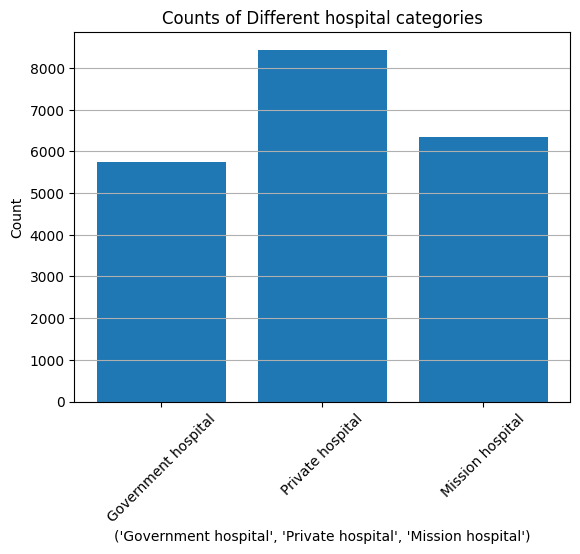

In [ ]:
category = ( 5742,8442,6348)
labels = ('Government hospital','Private hospital','Mission hospital')
# Plotting the bar plot
plt.bar(labels, category)
plt.xlabel(labels)
plt.ylabel('Count')
plt.title('Counts of Different hospital categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

In [ ]:
LOFanomaly = LOFanomalies['disease'].value_counts()
LOFanomaly

O80.0    2664
O80       808
N18       574
O82.1     194
N18.9     172
         ... 
O02.0       2
M54.5       2
O21         2
P74.1       2
J20.9       2
Name: disease, Length: 478, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Extract ground truth labels
true_labels = X_test['Outlier']

# Extract predicted outlier labels
predicted_labels = X_test['Outlier']

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

KeyError: 'Outlier'

#One class SVM

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
xtrain2 = xtrain.drop(columns = ['anomaly_score','anomaly'])
xtrain2

,days,Claim Amt,Bill Amt,days till notice,admission_month,discharge_month,received_month,admission_day,discharge_day,received_day
0,0,16000,8000,-8216,8,8,9,8,8,2
1,1,1800,77330,-8263,6,6,4,12,13,23
2,4,50000,50000,-8231,10,10,9,21,25,4
3,3,3600,3600,-7365,10,10,9,4,7,2
4,0,17000,3439,-5949,8,8,12,25,25,5
...,...,...,...,...,...,...,...,...,...,...
904879,1,5000,5000,74,5,5,7,18,19,31
904880,1,5000,5000,74,5,5,7,18,19,31
904881,0,5000,5000,106,4,4,7,14,14,29
904882,1,5000,5000,74,5,5,7,18,19,31


In [ ]:
xtrain2.dtypes
xtrain2.isna().sum()

days                0
Claim Amt           0
Bill Amt            0
days till notice    0
admission_month     0
discharge_month     0
received_month      0
admission_day       0
discharge_day       0
received_day        0
dtype: int64

In [ ]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(xtrain2)
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [ ]:
svm_model = OneClassSVM(kernel='rbf', nu=0.05, gamma=0.05)
svm_model.fit(df_scaled)

In [ ]:
# Predict the labels for each data point: inlier (1) or outlier (-1)
outlier = svm_model.predict(df_scaled)
# Adding the predicted labels to the DataFrame
df['svm_outlier_label'] = outlier

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(outlier_labels, bins=50, kde=True)
plt.title('Distribution of One-Class SVM Anomaly Scores')
plt.xlabel('svm_outlier_label')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Identify potential fraud cases
potential_fraud_svm = df[df['svm_outlier_label'] == -1]
print("Potential fraud cases detected by One-Class SVM:")
print(potential_fraud_svm[selected_features + ['svm_outlier_label']])

In [ ]:
from sklearn.svm import OneClassSVM

# Instantiate One-Class SVM model with contamination parameter (similar to LOF's contamination)
clf = OneClassSVM(nu=0.10,gamma=0.10)

# Fit the model to the training data
clf.fit(X_train)

# Predict outliers/anomalies on the test data
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming X_test and y_test are the test data and corresponding true labels
# Assuming y_pred contains the predicted labels from clf.predict(X_test)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, pos_label=-1)  # Assuming outliers are labeled as -1
recall = recall_score(y_test, y_pred, pos_label=-1)  # Assuming outliers are labeled as -1
f1 = f1_score(y_test, y_pred, pos_label=-1)  # Assuming outliers are labeled as -1

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)